# Objective: Import World Bank dataset and perform Exploratory Data Analysis

## Setup

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Data Downloaded from: 
https://datacatalog.worldbank.org/search/dataset/0039597/What%20a%20Waste%20Global%20Database?version=2

### Notes on Data
Data only encompasses residential, commercial, and institutional waste. Industrial, medical, hazardous, electronic, and construction and demolition waste not included.
All data is projected as of 2016; actual or estimated.
income_id: Gross National Income per capita: High Income country (>$12,475), Upper Middle ($4036 - $12475), Lower Middle ($1026 - $4035), Low Income (<1$1026)

In [2]:
path_to_dataset = r'C:\\Users\\patil\\Documents\\GitHub\\trashmap\\data\\raw'
filename = 'country_level_data.csv'
full_file_path = os.path.join(path_to_dataset, filename)
df = pd.read_csv(full_file_path)

In [3]:
df[['country_name', 'population_population_number_of_people', 'total_msw_total_msw_generated_tons_year']].head()

,country_name,population_population_number_of_people,total_msw_total_msw_generated_tons_year
0,Aruba,103187.0,8.813202e+04
1,Afghanistan,34656032.0,5.628525e+06
2,Angola,25096150.0,4.213644e+06
3,Albania,2854191.0,1.087447e+06
4,Andorra,82431.0,4.300000e+04


In [4]:
df['income_id'].unique()

array(['HIC', 'LIC', 'LMC', 'UMC', nan], dtype=object)

In [5]:
df.columns.to_list()

['iso3c',
 'region_id',
 'country_name',
 'income_id',
 'gdp',
 'composition_food_organic_waste_percent',
 'composition_glass_percent',
 'composition_metal_percent',
 'composition_other_percent',
 'composition_paper_cardboard_percent',
 'composition_plastic_percent',
 'composition_rubber_leather_percent',
 'composition_wood_percent',
 'composition_yard_garden_green_waste_percent',
 'other_information_information_system_for_solid_waste_management',
 'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
 'other_information_national_law_governing_solid_waste_management_in_the_country',
 'other_information_ppp_rules_and_regulations',
 'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
 'population_population_number_of_people',
 'special_waste_agricultural_waste_tons_year',
 'special_waste_construction_and_demolition_waste_tons_year',
 'special_waste_e_waste_tons_year',
 'special_waste_hazardous_waste_tons_year',
 'special_was

### Metadata

In [6]:
path_to_dataset = r'C:\\Users\\patil\\Documents\\GitHub\\trashmap\\data\\raw'
filename = 'country_level_codebook.csv'
full_file_path = os.path.join(path_to_dataset, filename)
meta = pd.read_csv(full_file_path)
meta

,regionID,iso3c,country_name,incomeID,measurement,units,year,source,comments
0,EAS,ASM,American Samoa,UMC,composition_food_organic_waste_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
1,EAS,ASM,American Samoa,UMC,composition_glass_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
2,EAS,ASM,American Samoa,UMC,composition_metal_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
3,EAS,ASM,American Samoa,UMC,composition_other_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,7; 8; 9; other includes disposable diaper (5.5...
4,EAS,ASM,American Samoa,UMC,composition_paper_cardboard_percent,%,2011.0,SPREP (Secretariat of the Pacific Regional Env...,NaN
...,...,...,...,...,...,...,...,...,...
3772,SSF,ZWE,Zimbabwe,LIC,waste_collection_coverage_total_percent_of_waste,Percent of households,2013.0,"Muchandiona, Aleck. 2013. ""Challenges and Oppo...",NaN
3773,SSF,ZWE,Zimbabwe,LIC,waste_treatment_other_percent,%,2015.0,"Mohee, R., and M. A. Z. Bundhoo. 2015. ""A Comp...",1
3774,SSF,ZWE,Zimbabwe,LIC,waste_treatment_recycling_percent,tonnes/year,2005.0,AFED (Arab Forum for Environment and Developme...,NaN
3775,SSF,ZWE,Zimbabwe,LIC,waste_treatment_unaccounted_for_percent,tonnes/year,NaN,NaN,NaN


## Working with country aggregated stats and total waste to begin with

In [32]:
cols = ['country_name', 'income_id', 'gdp', 'population_population_number_of_people', 'total_msw_total_msw_generated_tons_year']
agg = df[cols]
agg

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
0,Aruba,HIC,35563.312500,103187.0,8.813202e+04
1,Afghanistan,LIC,2057.062256,34656032.0,5.628525e+06
2,Angola,LMC,8036.690430,25096150.0,4.213644e+06
3,Albania,UMC,13724.058590,2854191.0,1.087447e+06
4,Andorra,HIC,43711.800780,82431.0,4.300000e+04
...,...,...,...,...,...
213,"Yemen, Rep.",LIC,8269.671875,27584212.0,4.836820e+06
214,South Africa,UMC,12666.607420,51729344.0,1.845723e+07
215,Zambia,LMC,3201.289307,14264756.0,2.608268e+06
216,Zimbabwe,LIC,3190.506592,12500525.0,1.449752e+06


In [33]:
col_names = ['country', 'income', 'gdp', 'population', 'total_msw']
agg.columns = col_names
agg = agg.dropna()
agg

,country,income,gdp,population,total_msw
0,Aruba,HIC,35563.312500,103187.0,8.813202e+04
1,Afghanistan,LIC,2057.062256,34656032.0,5.628525e+06
2,Angola,LMC,8036.690430,25096150.0,4.213644e+06
3,Albania,UMC,13724.058590,2854191.0,1.087447e+06
4,Andorra,HIC,43711.800780,82431.0,4.300000e+04
...,...,...,...,...,...
212,Kosovo,LMC,9723.561523,1801800.0,3.190000e+05
213,"Yemen, Rep.",LIC,8269.671875,27584212.0,4.836820e+06
214,South Africa,UMC,12666.607420,51729344.0,1.845723e+07
215,Zambia,LMC,3201.289307,14264756.0,2.608268e+06


### Handling duplicates, missing values, outliers and datatypes

In [34]:
agg.isnull().sum()

country       0
income        0
gdp           0
population    0
total_msw     0
dtype: int64

In [35]:
agg.duplicated().sum()

0

In [36]:
q1 = agg.quantile(0.25)
q3 = agg.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 2*iqr
upper_bound = q3 + 2*iqr

In [37]:
outlier_mask = (agg<lower_bound) | (agg > upper_bound)
outlier = outlier_mask.sum()
outlier

country        0
gdp            3
income         0
population    22
total_msw     24
dtype: int64

In [38]:
lower_bound, upper_bound

(gdp          -5.667797e+04
 population   -3.995413e+07
 total_msw    -9.874096e+06
 dtype: float64,
 gdp           9.698949e+04
 population    6.181687e+07
 total_msw     1.534288e+07
 dtype: float64)

In [39]:
outlier_gdp = outlier_mask['gdp']
agg[outlier_gdp]

,country,income,gdp,population,total_msw
116,Luxembourg,HIC,114323.40630,619896.0,490337.75
118,"Macao SAR, China",HIC,117335.58590,612167.0,377942.00
169,Singapore,HIC,97341.46875,5703600.0,1870000.00


In [40]:
outlier_size = outlier_mask['population'] | outlier_mask['total_msw']
agg[outlier_size]

,country,income,gdp,population,total_msw
6,Argentina,HIC,23550.099610,4.298152e+07,1.791055e+07
17,Bangladesh,LMC,3195.737061,1.557271e+08,1.477850e+07
26,Brazil,UMC,14596.246090,2.084949e+08,7.906958e+07
32,Canada,HIC,47672.078130,3.554456e+07,2.510303e+07
36,China,UMC,16092.300780,1.400050e+09,3.950814e+08
39,"Congo, Dem. Rep.",LIC,1055.572998,7.873615e+07,1.438523e+07
50,Germany,HIC,53784.781250,8.313280e+07,5.062788e+07
57,"Egypt, Arab Rep.",LMC,10301.107420,8.781326e+07,2.100000e+07
59,Spain,HIC,40985.558590,4.707678e+07,2.240855e+07
61,Ethiopia,LIC,1779.083984,9.987303e+07,6.532787e+06


### Finding the ranges of all data points and looking for negative data

In [41]:
agg.dtypes

country        object
income         object
gdp           float64
population    float64
total_msw     float64
dtype: object

In [42]:
num_col = agg.select_dtypes(include = ['number'])
neg_mask = num_col <0
neg_mask.sum()

gdp           0
population    0
total_msw     0
dtype: int64

In [43]:
def plot_features(df, filename = None):
    n_rows = 1
    n_cols = 3
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize= (15,8))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        ax = axes[i]
        sns.histplot(df[col], kde=True, ax = ax)
        ax.set_title(f'Distribution of {col}', fontsize = 12)
    plt.tight_layout()
    plt.savefig(filename)

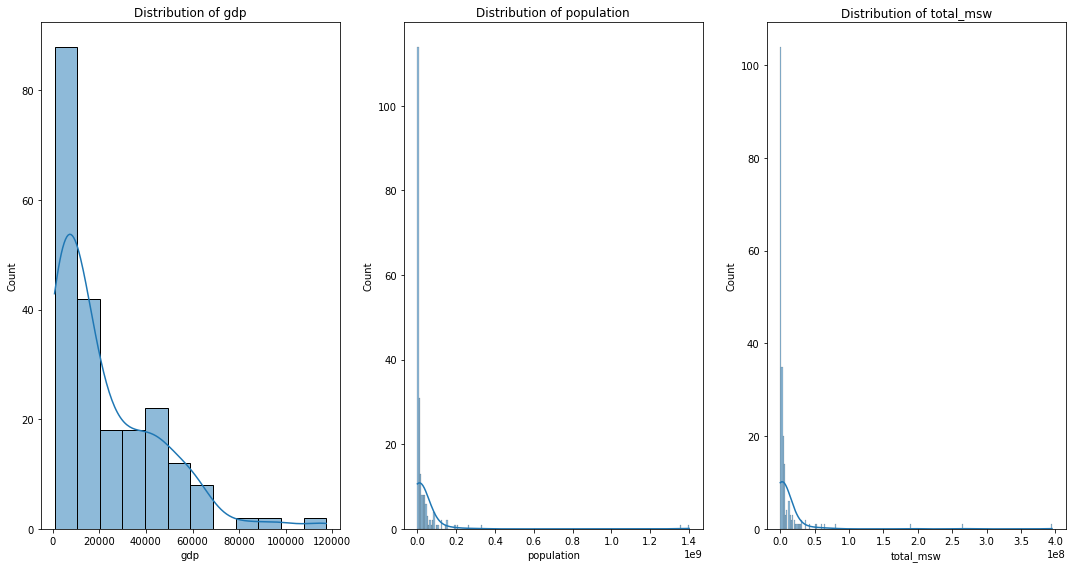

In [44]:
folder_path = r'C:\\Users\\patil\\Documents\\GitHub\\trashmap\\data\\processed'
filename = '01a_feature_distribution.jpeg'
full_file_path = os.path.join(folder_path, filename)
plot_features(num_col, full_file_path)

In [45]:
agg['msw_per_cap'] = agg['total_msw'] / agg['population'] * 907.185 #converting to kg waste per person per year
agg

<ipython-input-45-3e9727806c63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg['msw_per_cap'] = agg['total_msw'] / agg['population'] * 907.185 #converting to kg waste per person per year


,country,income,gdp,population,total_msw,msw_per_cap
0,Aruba,HIC,35563.312500,103187.0,8.813202e+04,774.826708
1,Afghanistan,LIC,2057.062256,34656032.0,5.628525e+06,147.336942
2,Angola,LMC,8036.690430,25096150.0,4.213644e+06,152.316361
3,Albania,UMC,13724.058590,2854191.0,1.087447e+06,345.637478
4,Andorra,HIC,43711.800780,82431.0,4.300000e+04,473.231612
...,...,...,...,...,...,...
212,Kosovo,LMC,9723.561523,1801800.0,3.190000e+05,160.612729
213,"Yemen, Rep.",LIC,8269.671875,27584212.0,4.836820e+06,159.072536
214,South Africa,UMC,12666.607420,51729344.0,1.845723e+07,323.687152
215,Zambia,LMC,3201.289307,14264756.0,2.608268e+06,165.876066


In [51]:
filename = '01a_GDP_vs_MSW.jpeg'
full_file_path = os.path.join(folder_path, filename)

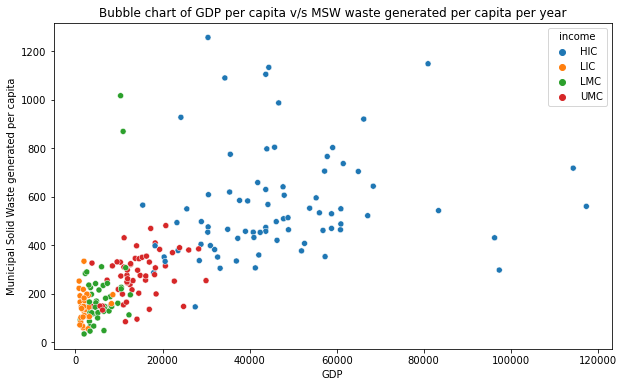

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = agg, x='gdp', y = 'msw_per_cap', hue = 'income')
plt.title(f'Bubble chart of GDP per capita v/s MSW waste generated per capita per year')
plt.xlabel('GDP')
plt.ylabel('Municipal Solid Waste generated per capita')
plt.savefig(full_file_path)


In [47]:
agg.describe()

,gdp,population,total_msw,msw_per_cap
count,214.000000,2.140000e+02,2.140000e+02,214.000000
mean,22457.828114,3.401024e+07,9.657102e+06,342.775386
std,22641.221695,1.375005e+08,3.608476e+07,236.985857
min,822.610474,1.109700e+04,3.989486e+03,33.901601
25%,4789.012085,7.542730e+05,2.126926e+05,153.840947
50%,13096.211425,5.778138e+06,1.798719e+06,293.252397
75%,35522.504882,2.110847e+07,5.256087e+06,459.996819
max,117335.585900,1.400050e+09,3.950814e+08,1256.358263


In [54]:
filename = '01a_country_level_data.csv'
full_file_path = os.path.join(folder_path, filename)
agg.to_csv(full_file_path, index = False)